## ADMISSIONS

Content
The dataset contains several parameters which are considered important during the application for graduate school. 

The parameters included are : 1. GRE Scores ( out of 340 ) 2. TOEFL Scores ( out of 120 ) 3. University Rating ( out of 5 ) 4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 5. Undergraduate GPA ( out of 10 ) 6. Research Experience ( either 0 or 1 ) 7. Chance of Admit ( ranging from 0 to 1 )

Features in the dataset:

GRE Scores (290 to 340)
TOEFL Scores (92 to 120)
University Rating (1 to 5)
Statement of Purpose (1 to 5)
Letter of Recommendation Strength (1 to 5)
Undergraduate CGPA (6.8 to 9.92)
Research Experience (0 or 1)
Chance of Admit (0.34 to 0.97)

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings

from IPython.display import display

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn import linear_model


np.random.seed(seed=456613)

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 22})

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)



In [2]:
admission = pd.read_csv('Admission_Predict.csv')
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500,4.500,9.650,1,0.920
1,2,324,107,4,4.000,4.500,8.870,1,0.760
2,3,316,104,3,3.000,3.500,8.000,1,0.720
3,4,322,110,3,3.500,2.500,8.670,1,0.800
4,5,314,103,2,2.000,3.000,8.210,0,0.650


In [3]:
admission = admission.drop('Serial No.', axis = 1)

In [4]:
admission.columns = ['GRE', 'TOEFL', 'Ranking', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

In [5]:
admission.head()

,GRE,TOEFL,Ranking,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500,4.500,9.650,1,0.920
1,324,107,4,4.000,4.500,8.870,1,0.760
2,316,104,3,3.000,3.500,8.000,1,0.720
3,322,110,3,3.500,2.500,8.670,1,0.800
4,314,103,2,2.000,3.000,8.210,0,0.650


In [6]:
admission.isnull().sum()

GRE                0
TOEFL              0
Ranking            0
SOP                0
LOR                0
CGPA               0
Research           0
Chance of Admit    0
dtype: int64

In [7]:
admission.shape

(500, 8)

In [8]:
admission.describe()

,GRE,TOEFL,Ranking,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,316.472,107.192,3.114,3.374,3.484,8.576,0.560,0.722
std,11.295,6.082,1.144,0.991,0.925,0.605,0.497,0.141
min,290.000,92.000,1.000,1.000,1.000,6.800,0.000,0.340
25%,308.000,103.000,2.000,2.500,3.000,8.127,0.000,0.630
50%,317.000,107.000,3.000,3.500,3.500,8.560,1.000,0.720
75%,325.000,112.000,4.000,4.000,4.000,9.040,1.000,0.820
max,340.000,120.000,5.000,5.000,5.000,9.920,1.000,0.970


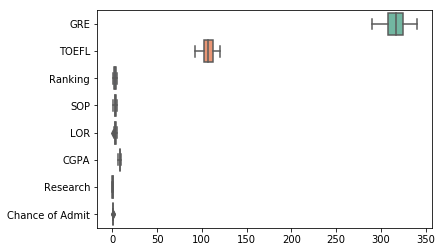

In [9]:
sns.boxplot(data=admission, orient="h", palette="Set2")
plt.show()

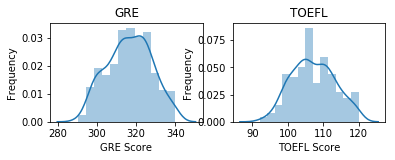

In [10]:
fig = plt.figure()

fig.add_subplot(221)
sns.distplot(admission['GRE'])
plt.title('GRE')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')


fig.add_subplot(222)
sns.distplot(admission['TOEFL'])
plt.title('TOEFL')
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')


plt.show()

Lowest: 92
Average: 107.192
Highest: 120


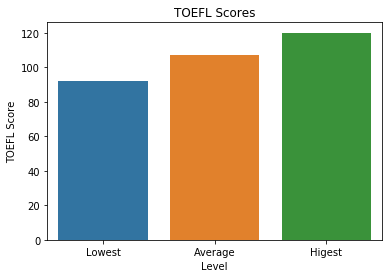

In [11]:
print("Lowest:",(admission['TOEFL'].min()))
print("Average:",(admission['TOEFL'].mean()))
print("Highest:",(admission['TOEFL'].max()))
y = np.array([admission['TOEFL'].min(),admission['TOEFL'].mean(),admission['TOEFL'].max()])
x = ["Lowest","Average","Higest"]
sns.barplot(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

Lowest: 290
Average: 316.472
Highest: 340


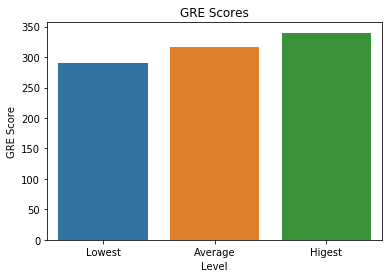

In [12]:
print("Lowest:",(admission['GRE'].min()))
print("Average:",(admission['GRE'].mean()))
print("Highest:",(admission['GRE'].max()))
y = np.array([admission['GRE'].min(),admission['GRE'].mean(),admission['GRE'].max()])
x = ["Lowest","Average","Higest"]
sns.barplot(x,y)
plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")
plt.show()

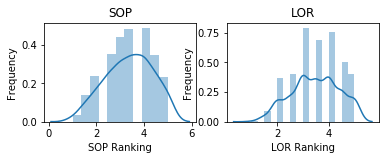

In [13]:
fig = plt.figure()

fig.add_subplot(221)
sns.distplot(admission['SOP'])
plt.title('SOP')
plt.xlabel('SOP Ranking')
plt.ylabel('Frequency')


fig.add_subplot(222)
sns.distplot(admission['LOR'])
plt.title('LOR')
plt.xlabel('LOR Ranking')
plt.ylabel('Frequency')


plt.show()

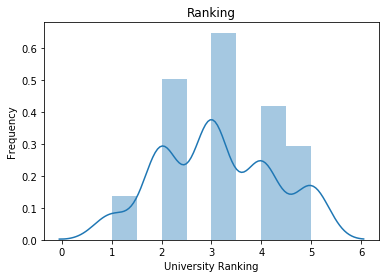

In [14]:
sns.distplot(admission['Ranking'])
plt.title('Ranking')
plt.xlabel("University Ranking")
plt.ylabel("Frequency")
plt.show()

No Research: 220
Research: 280


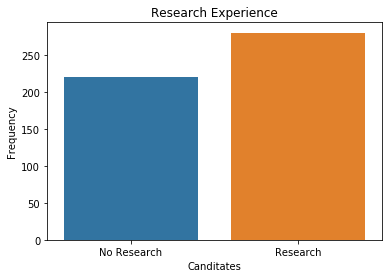

In [15]:
print("No Research:",len(admission[admission.Research == 0]))
print("Research:",len(admission[admission.Research == 1]))
y = np.array([len(admission[admission.Research == 0]),len(admission[admission.Research == 1])])
x = ["No Research","Research"]
sns.barplot(x,y)
plt.title("Research Experience")
plt.xlabel("Canditates")
plt.ylabel("Frequency")
plt.show()

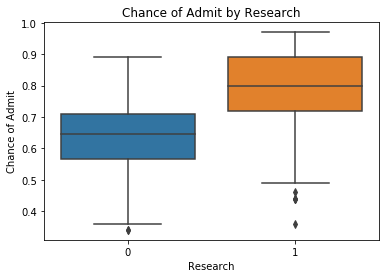

In [16]:
sns.boxplot(x = 'Research', y= 'Chance of Admit', data=admission)
plt.title('Chance of Admit by Research')
plt.show()

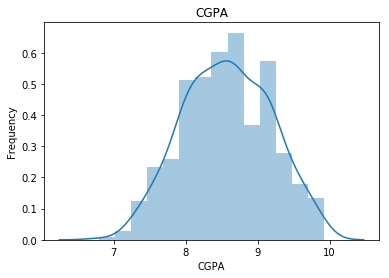

In [17]:
sns.distplot(admission['CGPA'])
plt.title('CGPA')
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

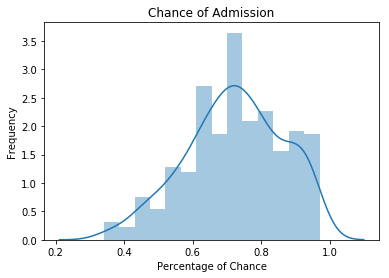

In [18]:
sns.distplot(admission['Chance of Admit'])
plt.title('Chance of Admission')
plt.xlabel("Percentage of Chance")
plt.ylabel("Frequency")
plt.show()

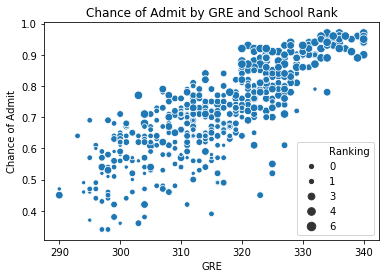

In [19]:
sns.scatterplot(x = 'GRE', y='Chance of Admit', size = 'Ranking', data=admission)
plt.title('Chance of Admit by GRE and School Rank')
plt.show()

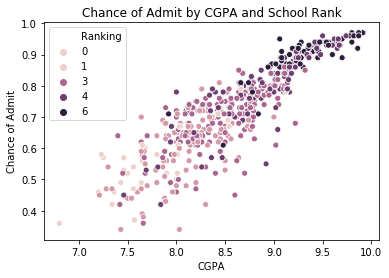

In [20]:
sns.scatterplot(x = 'CGPA', y='Chance of Admit', hue = 'Ranking', data=admission)
plt.title('Chance of Admit by CGPA and School Rank')
plt.show()

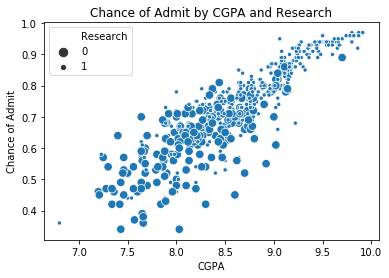

In [21]:
sns.scatterplot(x = 'CGPA', y='Chance of Admit', size = 'Research', data=admission)
plt.title('Chance of Admit by CGPA and Research')
plt.show()

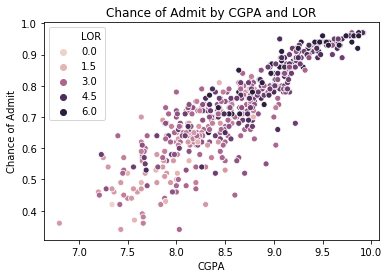

In [22]:
sns.scatterplot(x = 'CGPA', y= 'Chance of Admit', hue = 'LOR', data=admission)
plt.title('Chance of Admit by CGPA and LOR')
plt.show()

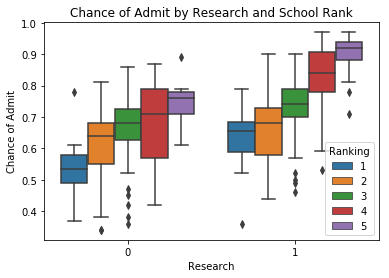

In [23]:
sns.boxplot(x = 'Research', y='Chance of Admit', hue = 'Ranking', data=admission)
plt.title('Chance of Admit by Research and School Rank')
plt.show()

In [24]:
admission[admission.Ranking == 1].mean()

GRE               304.912
TOEFL             100.206
Ranking             1.000
SOP                 1.941
LOR                 2.426
CGPA                7.799
Research            0.294
Chance of Admit     0.562
dtype: float64

Rank 1: 34
Rank 2: 126
Rank 3: 162
Rank 4: 105
Rank 5: 73


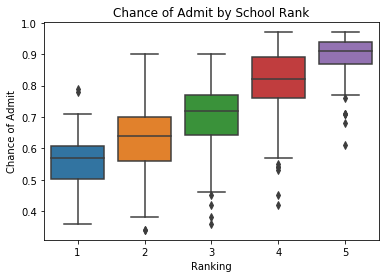

In [25]:

print("Rank 1:",len(admission[admission.Ranking == 1]))
print("Rank 2:",len(admission[admission.Ranking == 2]))
print("Rank 3:",len(admission[admission.Ranking == 3]))
print("Rank 4:",len(admission[admission.Ranking == 4]))
print("Rank 5:",len(admission[admission.Ranking == 5]))

sns.boxplot(x = 'Ranking', y='Chance of Admit', data=admission)
plt.title('Chance of Admit by School Rank')
plt.show()

In [26]:
corrmat = admission.corr()
print(corrmat)

                  GRE  TOEFL  Ranking   SOP   LOR  CGPA  Research  \
GRE             1.000  0.827    0.635 0.613 0.525 0.826     0.563   
TOEFL           0.827  1.000    0.650 0.644 0.542 0.811     0.467   
Ranking         0.635  0.650    1.000 0.728 0.609 0.705     0.427   
SOP             0.613  0.644    0.728 1.000 0.664 0.712     0.408   
LOR             0.525  0.542    0.609 0.664 1.000 0.637     0.373   
CGPA            0.826  0.811    0.705 0.712 0.637 1.000     0.501   
Research        0.563  0.467    0.427 0.408 0.373 0.501     1.000   
Chance of Admit 0.810  0.792    0.690 0.684 0.645 0.882     0.546   

                 Chance of Admit  
GRE                        0.810  
TOEFL                      0.792  
Ranking                    0.690  
SOP                        0.684  
LOR                        0.645  
CGPA                       0.882  
Research                   0.546  
Chance of Admit            1.000  


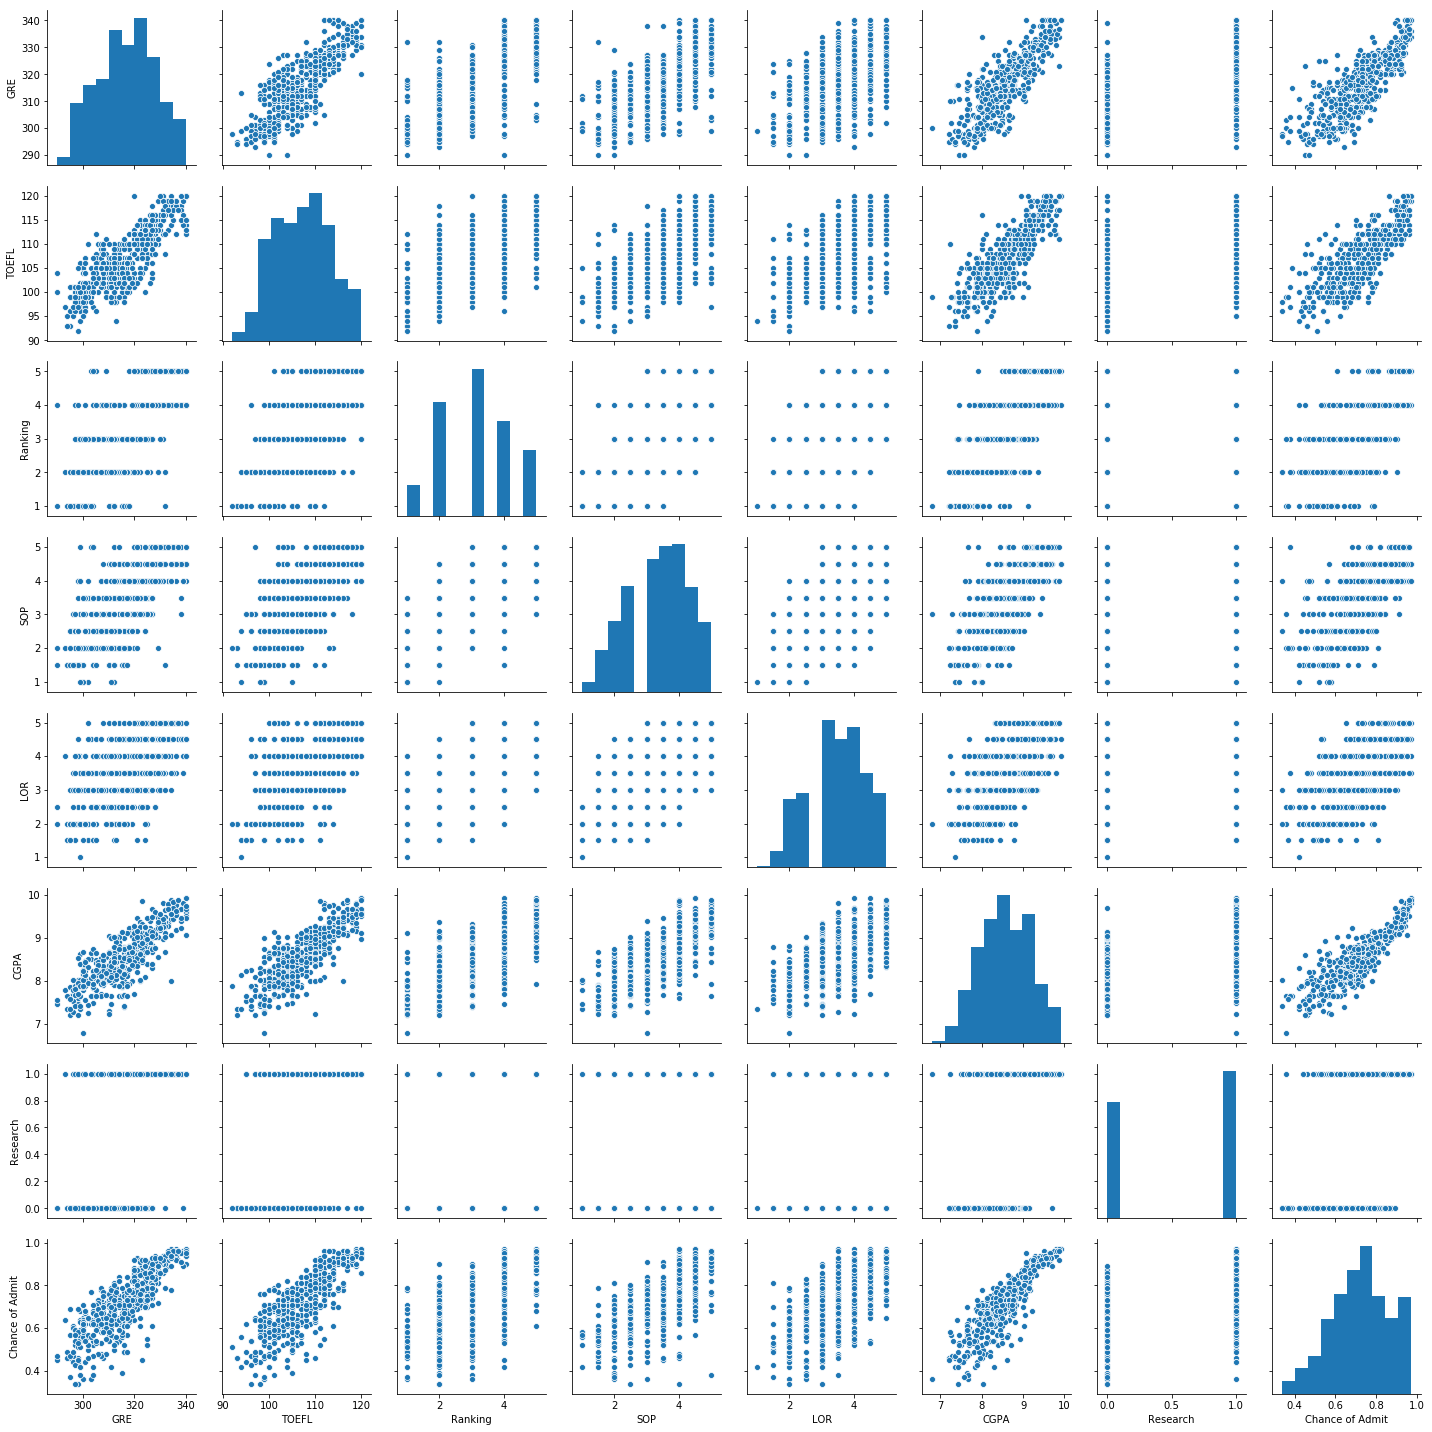

In [27]:
sns.pairplot(admission)
plt.show()

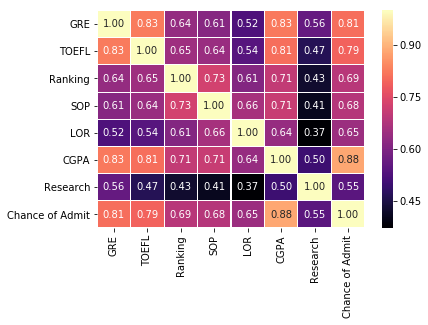

In [28]:
fig,ax = plt.subplots()
sns.heatmap(admission.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

 **TOEFL and GRE are highly correlated and therefore redundant.  I will create a new feature combining the two. I will scale them, then average them by subtracting the average of each variable from all values in that variable then divide by the standard deviation.  The new variable, Test Scores, is highly correlated with each of the variables.**  

In [29]:
means = admission[['GRE','TOEFL']].mean(axis=0)
stds = admission[['GRE','TOEFL']].std(axis=0)
admission['Test Scores'] = ((admission[['GRE','TOEFL']] - means) / stds).mean(axis=1)


In [30]:
# Check how well the composite correlates with each of the individual variables.
plot_admit = admission.loc[:, ['GRE','TOEFL']]
plot_admit['Test Scores'] = admission['Test Scores'] 
corrmat2 = plot_admit.corr()
print(corrmat2)

              GRE  TOEFL  Test Scores
GRE         1.000  0.827        0.956
TOEFL       0.827  1.000        0.956
Test Scores 0.956  0.956        1.000


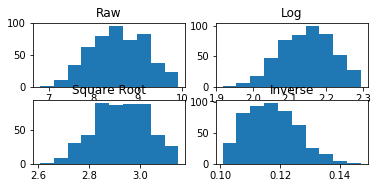

In [31]:
fig = plt.figure()

fig.add_subplot(321)
plt.hist(admission['CGPA'])
plt.title('Raw')

fig.add_subplot(322)
plt.hist(np.log(admission['CGPA']))
plt.title('Log')

fig.add_subplot(323)
plt.hist(np.sqrt(admission['CGPA']))
plt.title('Square Root')

fig.add_subplot(324)
plt.hist(1/admission['CGPA'])
plt.title('Inverse')
plt.show()

In [32]:
print(scipy.stats.shapiro(admission['CGPA']))
print(scipy.stats.shapiro(np.sqrt(admission['CGPA'])))
print(scipy.stats.shapiro(np.log(admission['CGPA'])))
print(scipy.stats.shapiro(1/admission['CGPA']))

(0.9922099113464355, 0.010284760035574436)
(0.9918057322502136, 0.00739665562286973)
(0.9905706644058228, 0.0027611267287284136)
(0.9855398535728455, 7.156959327403456e-05)


**Raw CGPA Data is most robust**

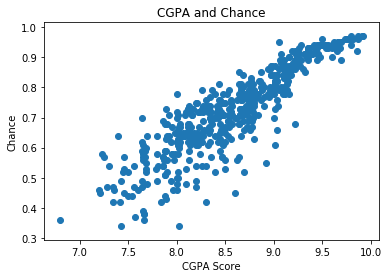

In [33]:
plt.scatter(admission['CGPA'], admission['Chance of Admit'])
plt.title("CGPA and Chance")
plt.xlabel('CGPA Score')
plt.ylabel('Chance')
plt.show()

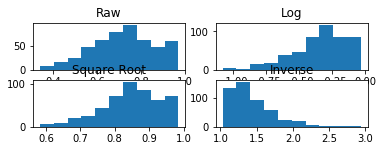

In [34]:
fig = plt.figure()

fig.add_subplot(421)
plt.hist(admission['Chance of Admit'])
plt.title('Raw')

fig.add_subplot(422)
plt.hist(np.log(admission['Chance of Admit']))
plt.title('Log')

fig.add_subplot(423)
plt.hist(np.sqrt(admission['Chance of Admit']))
plt.title('Square Root')

fig.add_subplot(424)
plt.hist(1/admission['Chance of Admit'])
plt.title('Inverse')
plt.show()

In [35]:
means = admission[['SOP','LOR']].mean(axis=0)
stds = admission[['SOP','LOR']].std(axis=0)
admission['Written_docs'] = ((admission[['SOP','LOR']] - means) / stds).mean(axis=1)

In [36]:
plot_admit_1 = admission.loc[:, ['SOP','LOR']]
plot_admit_1['Written_docs'] = admission['Written_docs'] 
corrmat5 = plot_admit_1.corr()
print(corrmat5)

               SOP   LOR  Written_docs
SOP          1.000 0.664         0.912
LOR          0.664 1.000         0.912
Written_docs 0.912 0.912         1.000


In [37]:
features = pd.get_dummies(admission['SOP']) 

features['SOP_Rank'] = np.where(admission['SOP']>=3, 1, 0)

print(admission['SOP'].groupby(features['SOP_Rank']).describe())

           count  mean   std   min   25%   50%   75%   max
SOP_Rank                                                  
0        138.000 2.098 0.443 1.000 2.000 2.000 2.500 2.500
1        362.000 3.860 0.650 3.000 3.500 4.000 4.500 5.000


In [38]:
features_written = admission.loc[:, ['SOP','LOR']]
features_written['SOP_Rank'] = features['SOP_Rank']
corrmat4 = features_written.corr()
print(corrmat4)

           SOP   LOR  SOP_Rank
SOP      1.000 0.664     0.796
LOR      0.664 1.000     0.500
SOP_Rank 0.796 0.500     1.000


In [39]:
features = pd.get_dummies(admission['LOR']) 

features['LOR_Rank'] = np.where(admission['LOR']>=3, 1, 0)

print(admission['LOR'].groupby(features['LOR_Rank']).describe())

           count  mean   std   min   25%   50%   75%   max
LOR_Rank                                                  
0        108.000 2.171 0.350 1.000 2.000 2.000 2.500 2.500
1        392.000 3.846 0.673 3.000 3.000 4.000 4.500 5.000


In [40]:
features_written = admission.loc[:, ['SOP','LOR']]
features_written['LOR_Rank'] = features['LOR_Rank'] 
corrmat3 = features_written.corr()
print(corrmat3)

           SOP   LOR  LOR_Rank
SOP      1.000 0.664     0.520
LOR      0.664 1.000     0.745
LOR_Rank 0.520 0.745     1.000


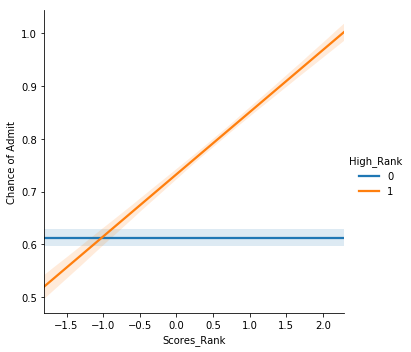

In [41]:
# Turn Ranking into a dummy variable

features['High_Rank'] = np.where(admission['Ranking']>=3, 1, 0)

features['Test Scores'] = admission['Test Scores']

# Create the interaction.
features['Scores_Rank'] = features['Test Scores'] * features['High_Rank']

# A plot of an interaction.

features['Chance of Admit'] = admission['Chance of Admit']
sns.lmplot(
    x='Scores_Rank',
    y='Chance of Admit',
    hue='High_Rank',
    data=features,
    scatter=False
)
plt.show()


#When taking Rank and test scores into consideration, there is only an impact on high ranking schools

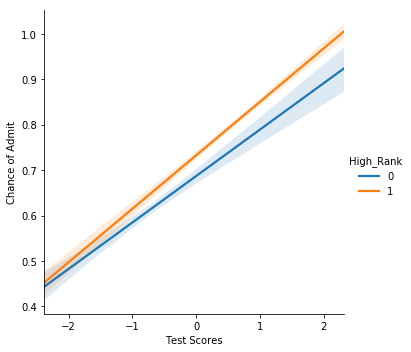

In [42]:
#When test scores are considered without taking into consideration Rank - as all test scores go up the chance of getting
#in also increases.

sns.lmplot(
    x='Test Scores',
    y='Chance of Admit',
    hue='High_Rank',
    data=features,
    scatter=False
)
plt.show()



In [43]:
admission['Scores_Rank'] = features['Scores_Rank']

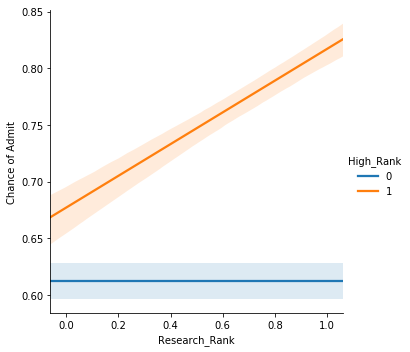

In [44]:
features['Research'] = admission['Research']

# Create the interaction.
features['Research_Rank'] = features['Research'] * features['High_Rank']

# A plot of an interaction.

sns.lmplot(
    x='Research_Rank',
    y='Chance of Admit',
    hue='High_Rank',
    data=features,
    scatter=False
)
plt.show()

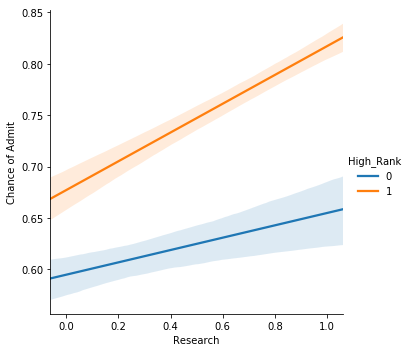

In [45]:
sns.lmplot(
    x='Research',
    y='Chance of Admit',
    hue='High_Rank',
    data=features,
    scatter=False
)
plt.show()



# Linear Regression

## All variables

In [46]:
X = admission.drop(['Chance of Admit'], 1)
y = admission['Chance of Admit']

In [47]:
est = sm.OLS(y, X) 
estres = est.fit() 
print(estres.summary()) 
ypred = estres.predict(X) 
print(ypred)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     283.5
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          1.27e-178
Time:                        13:26:06   Log-Likelihood:                 701.58
No. Observations:                 500   AIC:                            -1385.
Df Residuals:                     491   BIC:                            -1347.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
GRE             -0.0005      0.000     -1.459   

In [48]:
estres.params

GRE            -0.001
TOEFL          -0.002
Ranking         0.006
SOP            -0.004
LOR             0.011
CGPA            0.118
Research        0.024
Test Scores     0.051
Written_docs    0.012
Scores_Rank     0.004
dtype: float64

In [49]:
X.head(1)

,GRE,TOEFL,Ranking,SOP,LOR,CGPA,Research,Test Scores,Written_docs,Scores_Rank
0,337,118,4,4.500,4.500,9.650,1,1.797,1.117,1.797


In [50]:
#Cross validation is not available on stats model so I am using sklearn cross validation to compare to my R2 in my stats
#model summary

lr = linear_model.LinearRegression()
lr.fit(X, y)

lr_scores = cross_val_score(lr, X, y, cv=5)
lr_scores



array([0.67765378, 0.79435784, 0.86427046, 0.81734735, 0.89881656])

In [51]:
##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

Accuracy: 0.81 (+/- 0.15)


In [52]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(admission.columns, estres.params):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'coef'})
importances = importances.sort_values(by='coef', ascending=False).head(10)
importances

,coef
CGPA,0.118
Chance of Admit,0.051
Research,0.024
Test Scores,0.012
LOR,0.011
Ranking,0.006
Written_docs,0.004
GRE,-0.001
TOEFL,-0.002
SOP,-0.004


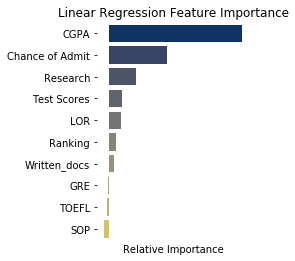

In [53]:
plt.subplot(1, 2, 2)
g= sns.barplot(x=importances['coef'], y=importances.index, palette='cividis')
plt.xticks([])
plt.xlabel('Relative Importance')
plt.title('Linear Regression Feature Importance')

plt.ylabel('')

sns.despine(left=True, bottom=True)

plt.tick_params(axis='both', which='major', labelsize=10)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.show(g)

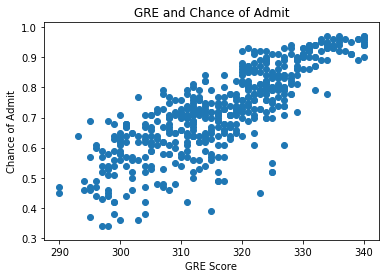

In [54]:
plt.scatter(admission['GRE'], admission['Chance of Admit'])
plt.title("GRE and Chance of Admit")
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.show()

**negative coef for GRE even though there is a postive correlation.  **The interaction between GRE and ranking could produce a negative correlation between GRE and ChanceTest Scores is a better feature representation than GRE.  

## Test Scores, CGPA, Written Docs

In [55]:
X_1= admission[['Test Scores','CGPA', 'Written_docs']] 
y = admission['Chance of Admit']

In [56]:
est = sm.OLS(y, X_1) 
estres = est.fit() 
print(estres.summary()) 
ypred_1 = estres.predict(X_1) 
print(ypred_1)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.334e+04
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:26:07   Log-Likelihood:                 682.96
No. Observations:                 500   AIC:                            -1360.
Df Residuals:                     497   BIC:                            -1347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Test Scores      0.0589      0.004     15.126   

In [57]:
actual = admission['Chance of Admit']
residual = actual - ypred_1

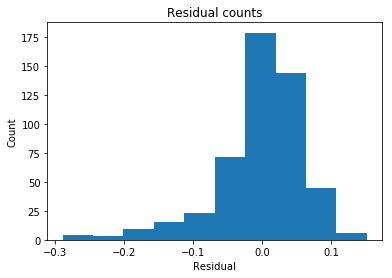

In [58]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

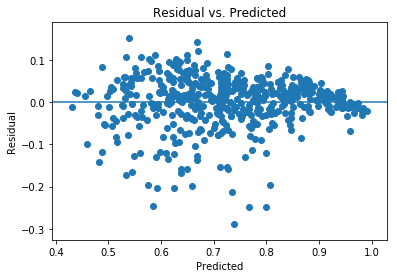

In [59]:
plt.scatter(ypred_1, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [60]:
# R2 indicate the model is overfitting

lr = linear_model.LinearRegression()
lr.fit(X_1, y)

lr_scores = cross_val_score(lr, X_1, y, cv=5)
lr_scores


array([0.67339693, 0.79673379, 0.87435321, 0.8177011 , 0.89999738])

In [61]:
##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

Accuracy: 0.81 (+/- 0.16)


## Test Scores, CGPA, Written Docs, Scores Rank

In [62]:
X_2= admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']] 
y = admission['Chance of Admit']

In [63]:
est = sm.OLS(y, X_2) 
estres = est.fit() 
print(estres.summary()) 
ypred_2 = estres.predict(X_2) 
print(ypred_2)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.748e+04
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:26:08   Log-Likelihood:                 683.08
No. Observations:                 500   AIC:                            -1358.
Df Residuals:                     496   BIC:                            -1341.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Test Scores      0.0565      0.006      9.073   

In [64]:
actual = admission['Chance of Admit']
residual = actual - ypred_2

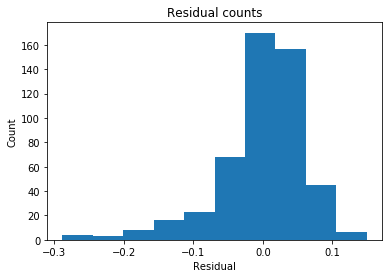

In [65]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

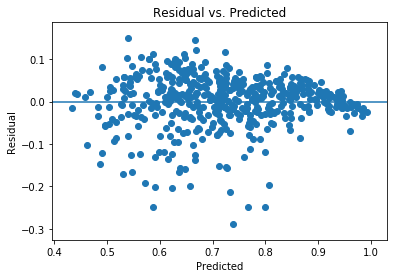

In [66]:
plt.scatter(ypred_2, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [67]:
#R2 indicate that the model is overfitting

lr = linear_model.LinearRegression()
lr.fit(X_2, y)

lr_scores = cross_val_score(lr, X_2, y, cv=5)
lr_scores


array([0.67342107, 0.79568024, 0.87396755, 0.81658308, 0.89875598])

In [68]:
##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

Accuracy: 0.81 (+/- 0.16)


## Test Scores, CGPA, LOR, Ranking, Research

In [69]:
X_3 = admission[['Test Scores', 'CGPA', 'LOR', 'Ranking',  'Research']]
y = admission['Chance of Admit']

In [70]:
est = sm.OLS(y, X_3) 
estres = est.fit() 
print(estres.summary()) 
ypred_3 = estres.predict(X_3) 
print(ypred_3)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.424e+04
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        13:26:08   Log-Likelihood:                 688.05
No. Observations:                 500   AIC:                            -1366.
Df Residuals:                     495   BIC:                            -1345.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Test Scores     0.0598      0.004     15.542      

In [71]:
#R2 indicate that model is overfitting

lr = linear_model.LinearRegression()
lr.fit(X_3, y)

lr_scores = cross_val_score(lr, X_3, y, cv=5)
lr_scores

array([0.68951657, 0.7941406 , 0.86539539, 0.81929976, 0.90137003])

In [72]:
##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std() * 2))

Accuracy: 0.81 (+/- 0.14)


# Logistic Regression

In [73]:
features = pd.get_dummies(admission['Chance of Admit']) 

features['Chance_Admit'] = np.where(admission['Chance of Admit']>=0.72, 1, 0)
print(pd.crosstab(features['Chance_Admit'], admission['Chance of Admit']))


Chance of Admit  0.340  0.360  0.370  0.380  0.390  0.420  0.430  0.440  \
Chance_Admit                                                              
0                    2      2      1      2      1      4      1      3   
1                    0      0      0      0      0      0      0      0   

Chance of Admit  0.450  0.460  ...    0.880  0.890  0.900  0.910  0.920  \
Chance_Admit                   ...                                        
0                    3      5  ...        0      0      0      0      0   
1                    0      0  ...        4     11      9     10      9   

Chance of Admit  0.930  0.940  0.950  0.960  0.970  
Chance_Admit                                        
0                    0      0      0      0      0  
1                   12     13      5      8      4  

[2 rows x 61 columns]


## All Variables

In [74]:
# Declare a logistic regression classifier.
# Parameter regularization coefficient C described above.
lr = LogisticRegression(C=1e9)
X = admission.drop(['Chance of Admit'], 1)
y = features['Chance_Admit']

# Fit the model.
fit = lr.fit(X, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X, y))

scores = cross_val_score(lr, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Coefficients
[[-0.02000056 -0.1219111   0.0999081   0.02973464  0.03691581  2.21604138
   0.90677135  3.48897318  0.58468113 -1.12809012]]
[-0.1533581]

 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             208   33
1              28  231

 Percentage accuracy
0.878
[0.84313725 0.8627451  0.78431373 0.88235294 0.92       0.82
 0.89795918 0.91836735 0.87755102 0.91836735]
0.8724793917567026
Accuracy: 0.87 (+/- 0.09)


## Test Scores, CGPA, Written Docs, Scores Rank

In [75]:
lr = LogisticRegression(C=1e9)
X_1 = admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']] 
y = features['Chance_Admit']

# Fit the model.
fit = lr.fit(X_1, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_1)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X_1, y))

scores = cross_val_score(lr, X_1, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Coefficients
[[ 2.9145325   2.20983461  0.69717648 -1.24556062]]
[-18.47733446]

 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             199   29
1              37  235

 Percentage accuracy
0.868
[0.8627451  0.8627451  0.82352941 0.84313725 0.84       0.82
 0.91836735 0.87755102 0.87755102 0.93877551]
0.8664401760704281
Accuracy: 0.87 (+/- 0.07)


## Test Scores, CGPA, Written Docs

In [76]:
lr = LogisticRegression(C=1e9)
X_2 = admission[['Test Scores','CGPA', 'Written_docs']] 
y = features['Chance_Admit']

# Fit the model.
fit = lr.fit(X_2, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_2)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X_2, y))

scores = cross_val_score(lr, X_2, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Coefficients
[[1.94705909 2.22439843 0.77773548]]
[-18.65931282]

 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             203   30
1              33  234

 Percentage accuracy
0.874
[0.8627451  0.8627451  0.82352941 0.8627451  0.84       0.84
 0.89795918 0.87755102 0.89795918 0.91836735]
0.8683601440576231
Accuracy: 0.87 (+/- 0.06)


## Test Scores, CGPA, LOR, Ranking, Research

In [77]:
lr = LogisticRegression(C=1e9)
X_3 = admission[['Test Scores', 'CGPA', 'LOR', 'Ranking',  'Research']]
y = features['Chance_Admit']

# Fit the model.
fit = lr.fit(X_3, y)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X_3)

print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(lr.score(X_3, y))

scores = cross_val_score(lr, X_3, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Coefficients
[[1.63992282 2.33418801 0.46893797 0.29566974 0.98027769]]
[-22.63603064]

 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             208   36
1              28  228

 Percentage accuracy
0.872
[0.8627451  0.8627451  0.82352941 0.88235294 0.86       0.8
 0.89795918 0.91836735 0.85714286 0.91836735]
0.8683209283713487
Accuracy: 0.87 (+/- 0.07)


# Random Forest Classifier

## All variables

In [78]:
rfc = ensemble.RandomForestClassifier()
X = admission.drop(['Chance of Admit'], 1)
y = features['Chance_Admit']
rfc.fit(X,y)

scores = cross_val_score(rfc, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.8627451  0.84313725 0.70588235 0.78431373 0.74       0.78
 0.85714286 0.85714286 0.87755102 0.89795918]
0.8205874349739896
Accuracy: 0.82 (+/- 0.12)


In [79]:
# Split the data into 40% test and 60% training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [80]:
feat_labels = ['GRE', 'TOEFL', 'Ranking', 'SOP', 'LOR', 'CGPA', 'Research']

In [81]:
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('GRE', 0.23440534666591226)
('TOEFL', 0.042352210957612914)
('Ranking', 0.02387420520184681)
('SOP', 0.026657945494787318)
('LOR', 0.026953746815875385)
('CGPA', 0.26108353544975466)
('Research', 0.025752553368976173)


In [82]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(rfc, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.15)

## Create a data subest with most important features

In [83]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [84]:
# Create a new random forest classifier for the most important features
rfc_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rfc_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Accuracy of limited feature classifier

In [85]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = rfc_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.83

Accuracy is:  0.83


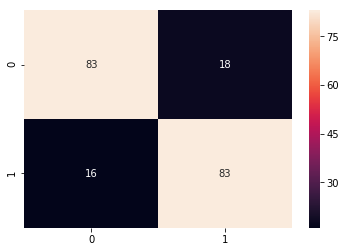

In [86]:
ac = accuracy_score(y_test,y_important_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,y_important_pred)
sns.heatmap(cm,annot=True,fmt="d")

## Test Scores, CGPA, Written Docs

In [87]:
X_1 = admission[['Test Scores','CGPA', 'Written_docs']]
y = features['Chance_Admit']
rfc.fit(X_1,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(rfc.score(X_1, y))

scores = cross_val_score(rfc, X_1, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             208   36
1              28  228

 Percentage accuracy
0.984
[0.82352941 0.80392157 0.74509804 0.84313725 0.74       0.82
 0.81632653 0.85714286 0.87755102 0.91836735]
0.8245074029611846
Accuracy: 0.82 (+/- 0.10)


In [89]:
feat_labels = ['Test Scores', 'CGPA', 'Written_docs']

In [90]:
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('Test Scores', 0.4555367368457798)
('CGPA', 0.3893257409161254)
('Written_docs', 0.15513752223809488)


## Test Scores, CGPA, Written Docs, Scores Rank

In [91]:
X_2 = admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']]
y = features['Chance_Admit']
rfc.fit(X_2,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(rfc.score(X_2, y))

scores = cross_val_score(rfc, X_2, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             208   36
1              28  228

 Percentage accuracy
0.986
[0.84313725 0.82352941 0.76470588 0.80392157 0.8        0.82
 0.81632653 0.81632653 0.87755102 0.83673469]
0.8202232893157264
Accuracy: 0.82 (+/- 0.06)


In [93]:
feat_labels = ['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']

In [94]:
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('Test Scores', 0.30402902512252866)
('CGPA', 0.5229936133399298)
('Written_docs', 0.09675662856203884)
('Scores_Rank', 0.07622073297550282)


## Test Scores, CGPA, LOR, Ranking, Research

In [95]:
X_3 = admission[['Test Scores', 'CGPA', 'LOR', 'Ranking',  'Research']]
y = features['Chance_Admit']
rfc.fit(X_3,y)

cross_val_score(rfc, X_3, y, cv=10)

array([0.8627451 , 0.8627451 , 0.78431373, 0.8627451 , 0.82      ,
       0.86      , 0.89795918, 0.85714286, 0.85714286, 0.85714286])

In [96]:
print('\n Accuracy by admission status')
print(pd.crosstab(pred_y_sklearn, y))

print('\n Percentage accuracy')
print(rfc.score(X_3, y))

scores = cross_val_score(rfc, X_3, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


 Accuracy by admission status
Chance_Admit    0    1
row_0                 
0             208   36
1              28  228

 Percentage accuracy
0.992
[0.8627451  0.82352941 0.78431373 0.8627451  0.8        0.82
 0.89795918 0.85714286 0.89795918 0.95918367]
0.8565578231292517
Accuracy: 0.86 (+/- 0.10)


In [97]:
feat_labels = ['Test Scores', 'CGPA', 'LOR', 'Ranking',  'Research']

In [98]:
for feature in zip(feat_labels, rfc.feature_importances_):
    print(feature)

('Test Scores', 0.2763162132323905)
('CGPA', 0.4744496327200799)
('LOR', 0.05678013506691321)
('Ranking', 0.11261907412407915)
('Research', 0.0798349448565373)


# Random Forest Regressor

## All Variables

In [99]:
reg = ensemble.RandomForestRegressor(random_state=1)
X = admission.drop(['Chance of Admit'], 1)
y = admission['Chance of Admit']
reg.fit(X,y)

cvs = cross_val_score(reg, X, y, cv=10, scoring='r2')
print(cvs)
print(cvs.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


[0.723652   0.5596083  0.78665096 0.68570532 0.8700669  0.81961218
 0.68994519 0.72587353 0.87631122 0.87340623]
0.7610831831074228
Accuracy: 0.86 (+/- 0.10)


## Test Scores, CGPA, Written Docs, Scores Rank

In [100]:
reg = ensemble.RandomForestRegressor(random_state=1)
X_1 = admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']]
y = admission['Chance of Admit']
reg.fit(X_1,y)

cvs = cross_val_score(reg, X_1, y, cv=10, scoring='r2')
print(cvs)
print(cvs.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.70816753 0.60709606 0.79711135 0.67399203 0.83468155 0.81300523
 0.63842311 0.72339493 0.8423     0.78446008]
0.7422631865806344
Accuracy: 0.86 (+/- 0.10)


## Test Scores, CGPA, Written Docs

In [101]:
reg = ensemble.RandomForestRegressor(random_state=1)
X_2= admission[['Test Scores','CGPA', 'Written_docs']] 
y = admission['Chance of Admit']

reg.fit(X_2,y)

cvs = cross_val_score(reg, X_2, y, cv=10, scoring='r2')
print(cvs)
print(cvs.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.7264216  0.60456267 0.7942435  0.67355052 0.82674315 0.83611949
 0.67822894 0.71820407 0.87808776 0.7750331 ]
0.7511194791407302
Accuracy: 0.86 (+/- 0.10)


## Test Scores, CGPA, LOR, Ranking, Research

In [102]:
reg = ensemble.RandomForestRegressor(random_state=1)
X_3 = admission[['Test Scores', 'CGPA', 'LOR', 'Ranking',  'Research']]
y = admission['Chance of Admit']

reg.fit(X_3,y)

cvs = cross_val_score(reg, X_3, y, cv=10, scoring='r2')
print(cvs)
print(cvs.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.76793383 0.60648822 0.76007251 0.6865442  0.80261783 0.83384781
 0.67377388 0.76631649 0.88487041 0.79370136]
0.7576166540805896
Accuracy: 0.86 (+/- 0.10)


# Support Vector Machine 

## All Variables

In [103]:
# Instantiate our model and fit the data.
X = admission.drop(['Chance of Admit'], 1)
y = features['Chance_Admit']
svm = SVC(kernel = 'linear')
svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [104]:
svm.score(X, y)

0.88

In [105]:
scores = cross_val_score(svm, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84313725 0.8627451  0.82352941 0.8627451  0.92       0.82
 0.87755102 0.89795918 0.87755102 0.91836735]
0.870358543417367
Accuracy: 0.87 (+/- 0.07)


## Test Scores, CGPA, Written Docs, Scores Rank

In [106]:
X_1 = admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']] 
y = features['Chance_Admit']
svm = SVC(kernel = 'linear')
svm.fit(X_1, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
svm.score(X_1, y)

0.874

In [108]:
scores = cross_val_score(svm, X_1, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8627451  0.84313725 0.82352941 0.84313725 0.84       0.82
 0.89795918 0.87755102 0.87755102 0.93877551]
0.8624385754301722
Accuracy: 0.86 (+/- 0.07)


In [109]:
# Instantiate our model and fit the data.
X_2 = admission[['GRE', 'CGPA']]
y = features['Chance_Admit']
svm = SVC(kernel = 'linear')
svm.fit(X_2, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [110]:
svm.score(X_2, y)

0.856

In [111]:
scores = cross_val_score(svm, X_2, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84313725 0.88235294 0.78431373 0.82352941 0.82       0.8
 0.85714286 0.85714286 0.91836735 0.91836735]
0.85043537414966
Accuracy: 0.85 (+/- 0.09)


## Test Scores, CGPA, Written Docs

In [112]:
X_3 = admission[['Test Scores','CGPA', 'Written_docs']]
y = features['Chance_Admit']
svm = SVC(kernel = 'linear')
svm.fit(X_3, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
svm.score(X_3, y)

0.868

In [114]:
scores = cross_val_score(svm, X_3, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8627451  0.84313725 0.82352941 0.84313725 0.82       0.82
 0.89795918 0.87755102 0.89795918 0.91836735]
0.8604385754301722
Accuracy: 0.86 (+/- 0.07)


## Test Scores, CGPA, LOR, Ranking, Research

In [115]:
X_4 = admission [['Test Scores', 'CGPA', 'LOR', 'Ranking', 'Research']]
y = features['Chance_Admit']
svm = SVC(kernel = 'linear')
svm.fit(X_4,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
scores = cross_val_score(svm, X_4, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8627451  0.84313725 0.82352941 0.88235294 0.86       0.82
 0.89795918 0.91836735 0.87755102 0.91836735]
0.8704009603841538
Accuracy: 0.87 (+/- 0.07)


# KNN classifier

## All Variables

In [117]:
X = admission.drop(['Chance of Admit'], 1)
y = features['Chance_Admit']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [119]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [120]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [121]:
y_pred = classifier.predict(X_test)  

In [122]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[37  7]
 [11 45]]
             precision    recall  f1-score   support

          0       0.77      0.84      0.80        44
          1       0.87      0.80      0.83        56

avg / total       0.82      0.82      0.82       100



In [123]:
scores = cross_val_score(classifier, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8627451  0.74509804 0.82352941 0.84313725 0.84       0.8
 0.85714286 0.83673469 0.91836735 0.93877551]
0.8465530212084834
Accuracy: 0.85 (+/- 0.10)


## Compare Error Rate with K Value

In [124]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

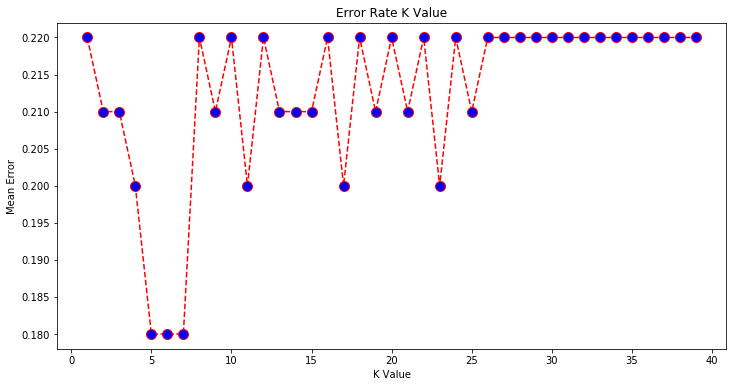

In [125]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

## Change K Value to 4, 7

In [126]:
classifier = KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [127]:
y_pred = classifier.predict(X_test)  

In [128]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[37  7]
 [13 43]]
             precision    recall  f1-score   support

          0       0.74      0.84      0.79        44
          1       0.86      0.77      0.81        56

avg / total       0.81      0.80      0.80       100



In [129]:
scores = cross_val_score(classifier, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8627451  0.76470588 0.76470588 0.80392157 0.82       0.8
 0.81632653 0.83673469 0.89795918 0.91836735]
0.828546618647459
Accuracy: 0.83 (+/- 0.10)


In [130]:
classifier = KNeighborsClassifier(n_neighbors=7)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [131]:
y_pred = classifier.predict(X_test)  

In [132]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[36  8]
 [10 46]]
             precision    recall  f1-score   support

          0       0.78      0.82      0.80        44
          1       0.85      0.82      0.84        56

avg / total       0.82      0.82      0.82       100



## Test Scores, CGPA, Written Docs, Scores Rank

In [133]:
X_1 = admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']] 
y = features['Chance_Admit']

In [134]:
X_1train, X_1test, y_train, y_test = train_test_split(X_1, y, test_size=0.20) 

In [135]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_1train = scaler.transform(X_train)  
X_1test = scaler.transform(X_test)  

In [136]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_1train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
y_pred = classifier.predict(X_1test)  

In [138]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[27 18]
 [19 36]]
             precision    recall  f1-score   support

          0       0.59      0.60      0.59        45
          1       0.67      0.65      0.66        55

avg / total       0.63      0.63      0.63       100



In [139]:
scores = cross_val_score(classifier, X_1, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84313725 0.84313725 0.80392157 0.84313725 0.78       0.8
 0.91836735 0.81632653 0.91836735 0.87755102]
0.8443945578231291
Accuracy: 0.84 (+/- 0.09)


## Test Scores, CGPA, Written Docs

In [140]:
X_2 = admission[['Test Scores','CGPA', 'Written_docs']] 
y = features['Chance_Admit']

In [141]:
X_2train, X_2test, y_train, y_test = train_test_split(X_2, y, test_size=0.20) 

In [142]:
scaler = StandardScaler()  
scaler.fit(X_2train)

X_2train = scaler.transform(X_2train)  
X_2test = scaler.transform(X_2test)  

In [143]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_2train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [144]:
y_pred = classifier.predict(X_2test)  

In [145]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[30 14]
 [ 5 51]]
             precision    recall  f1-score   support

          0       0.86      0.68      0.76        44
          1       0.78      0.91      0.84        56

avg / total       0.82      0.81      0.81       100



In [146]:
scores = cross_val_score(classifier, X_2, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.84313725 0.84313725 0.80392157 0.82352941 0.82       0.82
 0.89795918 0.85714286 0.87755102 0.89795918]
0.8484337735094037
Accuracy: 0.85 (+/- 0.06)


## Test Scores, CGPA, LOR, Ranking, Research

In [147]:
X_3 = admission[['Test Scores','CGPA', 'LOR', 'Ranking','Research']] 
y = features['Chance_Admit']

In [148]:
X_3train, X_3test, y_train, y_test = train_test_split(X_3, y, test_size=0.20) 

In [149]:
scaler = StandardScaler()  
scaler.fit(X_3train)

X_3train = scaler.transform(X_3train)  
X_3test = scaler.transform(X_3test)  

In [150]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_3train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [151]:
y_pred = classifier.predict(X_3test)  

In [152]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[44  8]
 [ 5 43]]
             precision    recall  f1-score   support

          0       0.90      0.85      0.87        52
          1       0.84      0.90      0.87        48

avg / total       0.87      0.87      0.87       100



In [153]:
scores = cross_val_score(classifier, X_3, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.80392157 0.8627451  0.74509804 0.78431373 0.86       0.86
 0.89795918 0.87755102 0.89795918 0.87755102]
0.8467098839535815
Accuracy: 0.85 (+/- 0.10)


# Gradient Boost on strongest model (SVM)

In [154]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
X = admission.drop(['Chance of Admit'], 1)
y = features['Chance_Admit']

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [155]:
# We'll make 500 iterations, use 4-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.04
Percent Type II errors: 0.04


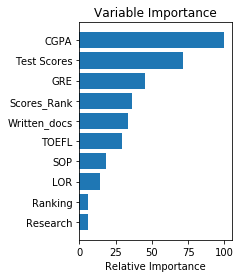

In [156]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [157]:
scores = cross_val_score(clf, X, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.78431373 0.80392157 0.78431373 0.82352941 0.8        0.86
 0.87755102 0.85714286 0.81632653 0.89795918]
0.8305058023209284
Accuracy: 0.83 (+/- 0.08)


## Test Scores, CGPA, Written Docs, Scores Rank

In [158]:
# Definine outcome and predictors.
# Set our outcome to 0 and 1.
X_1 = admission[['Test Scores','CGPA', 'Written_docs', 'Scores_Rank']] 
y = features['Chance_Admit']

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_1train, y_train = X_1[:offset], y[:offset]

# And put 10% in the test set.
X_1test, y_test = X_1[offset:], y[offset:]

In [159]:
# We'll make 500 iterations, use 4-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_1train, y_train)

predict_train = clf.predict(X_1train)
predict_test = clf.predict(X_1test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.06
Percent Type II errors: 0.06


In [160]:
scores = cross_val_score(clf, X_1, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.82352941 0.84313725 0.7254902  0.82352941 0.74       0.9
 0.83673469 0.81632653 0.85714286 0.87755102]
0.8243441376550621
Accuracy: 0.82 (+/- 0.10)


## Test Scores, CGPA, Written Docs

In [161]:
X_2 = admission[['Test Scores','CGPA', 'Written_docs']] 
y = features['Chance_Admit']

# Create training and test sets.
offset = int(X_2.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_2train, y_train = X_2[:offset], y[:offset]

# And put 10% in the test set.
X_2test, y_test = X_2[offset:], y[offset:]

In [162]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_2train, y_train)

predict_train = clf.predict(X_2train)
predict_test = clf.predict(X_2test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))




Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.08
Percent Type II errors: 0.08


In [163]:
scores = cross_val_score(clf, X_2, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.78431373 0.80392157 0.66666667 0.84313725 0.7        0.86
 0.81632653 0.79591837 0.87755102 0.83673469]
0.7984569827931172
Accuracy: 0.80 (+/- 0.13)


## Test Scores, CGPA, LOR, Ranking, Research

In [164]:
X_3 = admission [['Test Scores', 'CGPA', 'LOR', 'Ranking', 'Research']]
y = features['Chance_Admit']

# Create training and test sets.
offset = int(X_3.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_3train, y_train = X_3[:offset], y[:offset]

# And put 10% in the test set.
X_3test, y_test = X_3[offset:], y[offset:]

In [165]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_3train, y_train)

predict_train = clf.predict(X_3train)
predict_test = clf.predict(X_3test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0

Test set accuracy:
Percent Type I errors: 0.04
Percent Type II errors: 0.04


In [166]:
scores = cross_val_score(clf, X_3, y, cv=10)

print(scores)
print(scores.mean())

##  mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.8627451  0.82352941 0.74509804 0.84313725 0.7        0.86
 0.83673469 0.81632653 0.85714286 0.87755102]
0.8222264905962385
Accuracy: 0.82 (+/- 0.11)


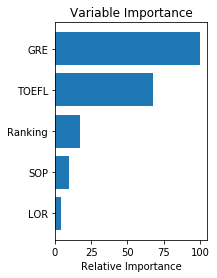

In [167]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()